#### Avinash Saini
#### 200232

In [1]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
import glob

In [4]:
# this reads all the paths of all folders present in flowers.
allFolders = glob.glob("D:/Is-the-road-safe-/Assignment-2/flowers/*") 

train_files = []
# Here we append all the file paths present in a single folder 
for folder in allFolders:
    train_files.append(glob.glob(folder + "/*"))

In [5]:
# train_files is a multidimensional list 
# We iterate through every path present and append it in allFlowers.


allFlowers = []

for oneFlower in train_files:
    for flower in oneFlower:
        allFlowers.append(flower)
        
# allFlowers variable store file path of all the flowers in single dimensional list.

In [6]:
print(allFlowers[15000])
print(allFlowers[15000].split('\\')[1])
myList = []
myList.append(allFlowers[15000].split('\\')[1])
print(myList)

D:/Is-the-road-safe-/Assignment-2/flowers\water_lily\29645429356_c6bd9ecab3_c.jpg
water_lily
['water_lily']


In [7]:
print("There are ", len(allFlowers) , " flowers in total .")

There are  15740  flowers in total .


In [8]:
# Here we randomize the data set

from random import shuffle
shuffle(allFlowers)

Enter the index of flower you want to see 5200


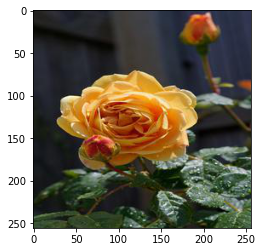

In [9]:
from PIL import Image


# Making it a bit interactive, to show the image the user wants to see !!
n = int(input("Enter the index of flower you want to see "))
img=Image.open(allFlowers[n])
plt.imshow(img)

In [10]:

img = Image.open(allFlowers[10])
print(img.size)
arr = np.array(img.resize((128,128)).convert('L'))
print(arr.shape)

(256, 256)
(128, 128)


In [11]:
print(img.format)
print(img.mode)

JPEG
RGB


In [14]:
train_set = allFlowers[:10000]

In [16]:
X_train=np.zeros((len(train_set),256, 256))

In [17]:
Y_train = []
for i, ft in enumerate(train_set):
    im=Image.open(ft)
    im_array=np.array(im.convert('L')) # We converted the image into grayscale
    if(im_array.shape[0] == 256 and im_array.shape[1] == 256):
        X_train[i,:,:]=im_array
        Y_train.append(ft.split('\\')[1])

In [18]:
X_train =  X_train/255 # Rationalizing the Image array !

In [17]:
print(X_train[0]) ## Printing the numpy array corresponding to first image
print(Y_train[2])

[[0.08235294 0.09019608 0.08235294 ... 0.15686275 0.16078431 0.16078431]
 [0.07843137 0.08627451 0.10196078 ... 0.17254902 0.18431373 0.18431373]
 [0.09019608 0.08235294 0.09803922 ... 0.22745098 0.24705882 0.2627451 ]
 ...
 [0.3254902  0.30980392 0.28627451 ... 0.89411765 0.91764706 0.93333333]
 [0.30588235 0.29411765 0.27058824 ... 0.87058824 0.90196078 0.92156863]
 [0.27058824 0.25882353 0.23921569 ... 0.89019608 0.90980392 0.91764706]]
black_eyed_susan


In [46]:
model= keras.Sequential([
    # 1
    keras.layers.Conv2D(
    filters=120,
    kernel_size=3,
        # filtering out negative values
    activation='relu',
    input_shape=(256,256)
    ),
    # 2
    keras.layers.Conv2D(
    filters=24,
    kernel_size=3,
    activation='relu',
    ),
    # 3
    # 1d matrix
    keras.layers.Flatten(),
    # 4
    # reduction layers
    keras.layers.Dense(
        units=96,
        activation='relu',
    ),
    # 5 
    # 96 units -> 6 units
    keras.layers.Dense(6,activation='softmax') # 0-5 fingers
    
])

ValueError: Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 256, 256)

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 120)     1200      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 24)      25944     
                                                                 
 flatten (Flatten)           (None, 369024)            0         
                                                                 
 dense (Dense)               (None, 96)                35426400  
                                                                 
 dense_1 (Dense)             (None, 6)                 582       
                                                                 
Total params: 35,454,126
Trainable params: 35,454,126
Non-trainable params: 0
_________________________________________________________________


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
Y_train = LabelEncoder().fit_transform(Y_train)

In [51]:
Y_train

array([ 1, 14,  9, ...,  6,  7, 12], dtype=int64)

In [52]:
from keras.utils import to_categorical

In [53]:
Y_train_new = to_categorical(Y_train)

In [54]:
Y_train_new

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [55]:
Y_train_new[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [56]:
model.fit(X_train, Y_train,epochs=2,validation_split=0.1)

Epoch 1/2


ValueError: in user code:

    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Anaconda\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 128, 128, 1), found shape=(None, 256, 256)
